# Redshift evolution of model parameters

There are essentially two model parameters that are of significance here: $R_g$ and $A_w$. These are defined in Tinker and Chen 2008 as $R_g=80(M/1e12 M_\odot)h^{-1}kpc$ and $A_w$ is defined in equation 6. 

In [1]:
import astropy.units as u
from astropy.units.astrophys import Mpc, M_sun
import numpy as np
import pdb, time, cProfile
from MgIIabs.model import absdistrib as ad, halomodel as hmod
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.integrate import simps

The following figure can be compared directly to the figure 2.a in Tinker and Chen's paper. While it seems to be in agreement for low REW, it is two orders of magnitude above the values predicted for higher REW. I have checked all relevant code and there seems to be nothing wrong though.

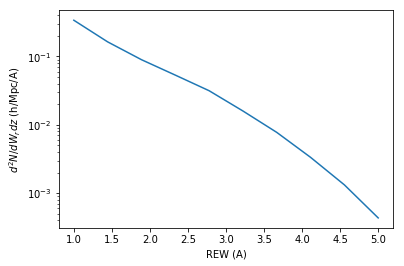

In [2]:
rewlist = np.linspace(0.1,0.5,10)*u.nm
d2ndwdllist = []
for rew in rewlist:
    d2ndwdllist.append(ad.d2ndWdz(rew).value/10)
plt.semilogy(rewlist.value*10,d2ndwdllist)
plt.xlabel("REW (A)")
plt.ylabel(r"$d^2N/dW_rdz$ (h/Mpc/A)")
plt.show()

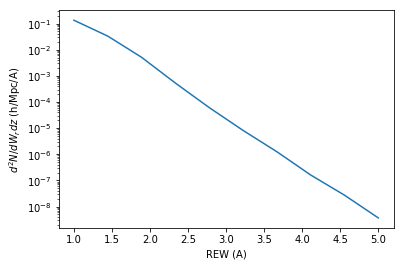

In [4]:
rewlist = np.linspace(0.1,0.5,10)*u.nm
d2ndwdllist = []
for rew in rewlist:
    d2ndwdllist.append(ad.d2ndWdz(rew,z=2.5).value/10)
plt.semilogy(rewlist.value*10,d2ndwdllist)
plt.xlabel("REW (A)")
plt.ylabel(r"$d^2N/dW_rdz$ (h/Mpc/A)")
plt.show()

Assuming $R_g$ to behave like Tinker and Chen expect, i.e. if their comoving radii were constant for a given mass, the following is how one would get $d^2N/dWdz$. This is contradictory to obervations. The graphs for redshifts between 0.5 and 1.5 are supposed to be higher than that for 0 and 2.5 (i.e. there needs to be an increase of absorbers around 0.8).

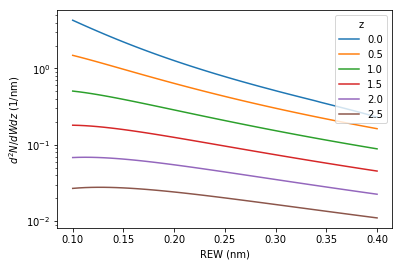

In [4]:
#Redshift dependence of Rg->1/(1+z)
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()

Now to figure out how it would be for the redius to evolve proportional to $(1+z)^2$ instead of $1/(1+z)$.

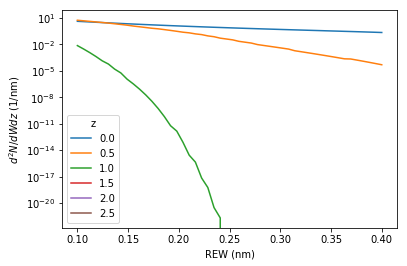

In [2]:
#Redshift dependence of Rg=(1+z)^2
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()    

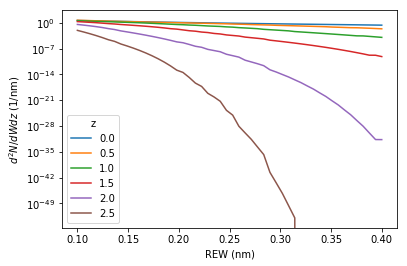

In [2]:
#Redshift dependence of Rg propto (1+z)^1
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()    

In both of these caases, because of the normalisation chosen, even though the cross sectional are becomes large, the gas gets spread out and thus cannot produce strong absorption. I shall now try no redshift evolution for $R_g$.

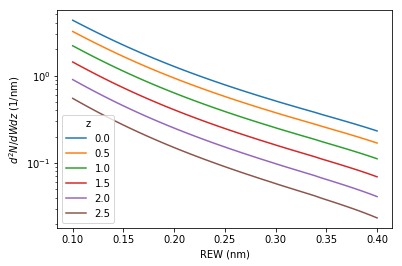

In [2]:
#Redshift dependence of Rg=const. for a given mass.
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()    

As this is more or less like the constant comoving radius case, I shall now try changing $A_w$. 

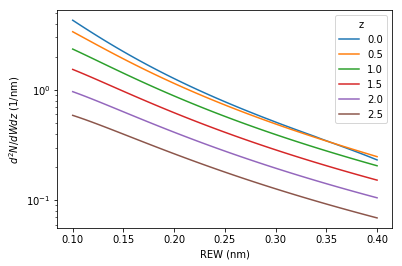

In [4]:
#Redshift dependence of Rg=const and A_w goes as (1+z)^0.5 
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()    

This is promising. The graphs for redhsift 0.5 is about the same as redshift 0. Maybe a stronger evolution will increase it even more.

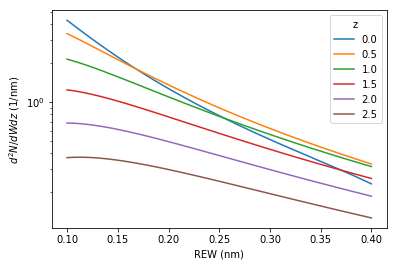

In [3]:
#Redshift dependence of Rg=const and A_w goes as (1+z) 
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()

Just going to try to see what happens if we keep Tinker and Chen's redshift evolution of gas radius and increasing $A_w$ strongly

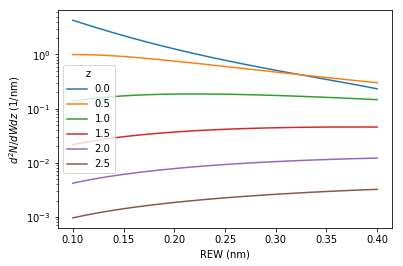

In [2]:
#Redshift dependence of Rg=1/(1+z) and A_w goes as (1+z)^2
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()

It isn't as good as constant radius. Maybe something milder for $A_w$ and constant $R_g$ for a given mass

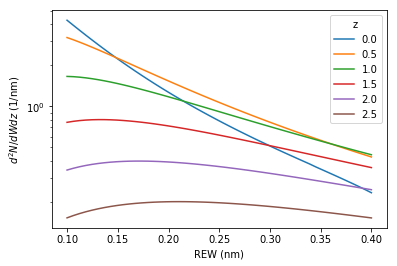

In [2]:
#Redshift dependence of Rg=const and A_w goes as (1+z)^1.5
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()

## Rough work and calculations
None of what follows is final or relevant.

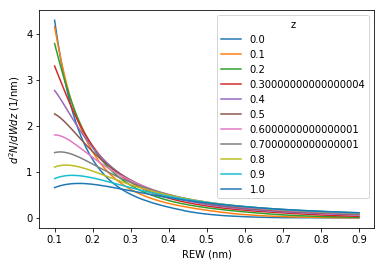

In [4]:
#Redshift dependence of Rg=(1+z)^-0.2 and A_w as (1+z)^2
rewlist = np.linspace(0.1,0.9,200)*u.nm
redshifts = np.linspace(0,1,11)
d2ndwdlarray = np.zeros((11,200))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.plot(rewlist.value,d2ndwdlarray[row],label=str(z))
np.savetxt("test.txt",d2ndwdlarray)
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show() 

In [3]:
np.savetxt("test.txt",d2ndwdlarray)

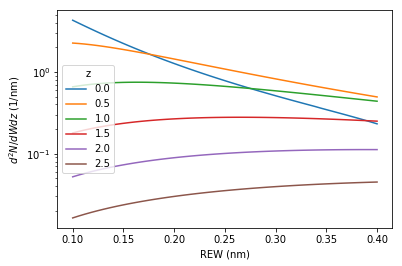

In [2]:
#Redshift dependence of Rg=(1+z)^-0.2 and A_w as (1+z)^2
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show() 

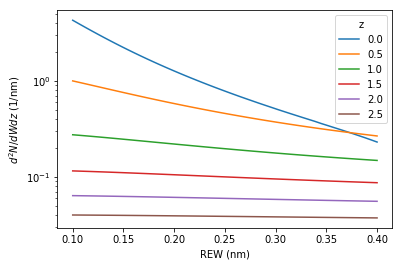

In [2]:
#Redshift dependence of Rg=(1+z)^-2
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()    

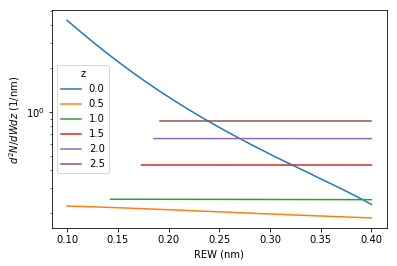

In [2]:
#Redshift dependence of Rg=(1+z)^-5
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()    

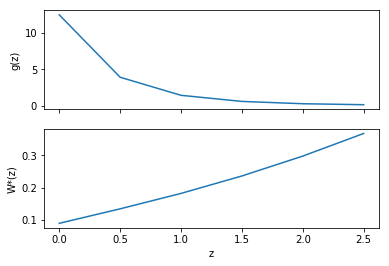

In [4]:
fit_func = lambda x,g,W: g*np.exp(-x/W)
guess = [1,0.1]
glist = []
wlist = []
for row in d2ndwdlarray:
    popt,pcov = curve_fit(fit_func,ydata=row,xdata=rewlist.value,p0=guess)
    glist.append(popt[0])
    wlist.append(popt[1])
fig, axes = plt.subplots(2,1,sharex=True)
axes[0].plot(redshifts,glist)
axes[0].set(ylabel="g(z)")

axes[1].plot(redshifts,wlist)
axes[1].set(xlabel="z",ylabel="W*(z)")
plt.show()

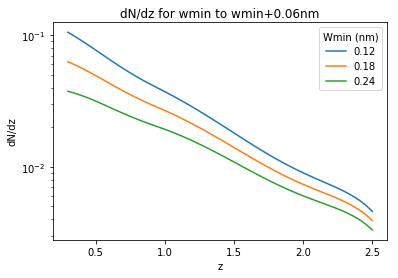

In [26]:
glist = np.asarray(glist)
wlist = np.asarray(wlist)
g = interp1d(y=glist,x=redshifts,bounds_error=False,fill_value="extrapolate",kind="cubic")
w = interp1d(y=wlist,x=redshifts,bounds_error=False,fill_value="extrapolate",kind="cubic")
def dndz(z,w_min,w_max=float('inf')):
    gval = g(z)
    wval = w(z)
    return gval*wval*(np.exp(-w_min/wval)-np.exp(-w_max/wval))

wmins = np.array([0.12,0.18,0.24])
wmaxs = wmins+0.06
newredshifts = np.linspace(0.3,2.5)
for index, wmin in enumerate(wmins):
    plt.semilogy(newredshifts,dndz(newredshifts,wmin,wmaxs[index]),label=str(wmin))
plt.legend(title="Wmin (nm)")
plt.title("dN/dz for wmin to wmin+0.06nm")
plt.ylabel("dN/dz")
plt.xlabel("z")
plt.show()


# $dN/dz$

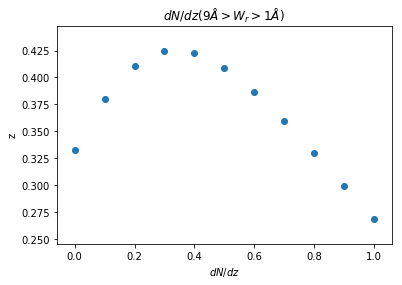

In [7]:
rewlist = np.linspace(0.1,0.8,200)*u.nm
redshifts = np.linspace(0,1,11)
d2ndwdlarray = np.loadtxt('test.txt')
dndzlist = np.zeros(11)

for n in np.arange(11):
    dndzlist[n] = simps(d2ndwdlarray[n],rewlist)
    
plt.scatter(redshifts,dndzlist)
plt.xlabel(r"$dN/dz$")
plt.ylabel(r"z")
plt.title(r"$dN/dz (9 \AA >W_r > 1 \AA)$")
plt.show()

In [17]:
help(np.zeros)

Help on built-in function zeros in module numpy.core.multiarray:

zeros(...)
    zeros(shape, dtype=float, order='C')
    
    Return a new array of given shape and type, filled with zeros.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional
        Whether to store multidimensional data in C- or Fortran-contiguous
        (row- or column-wise) order in memory.
    
    Returns
    -------
    out : ndarray
        Array of zeros with the given shape, dtype, and order.
    
    See Also
    --------
    zeros_like : Return an array of zeros with shape and type of input.
    ones_like : Return an array of ones with shape and type of input.
    empty_like : Return an empty array with shape and type of input.
    ones : Return a new array setting v

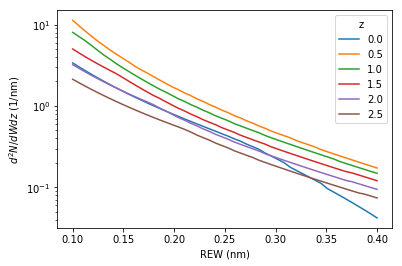

In [2]:
#Redshift dependence of A_w goes as (1+z)^2
rewlist = np.linspace(0.1,0.4)*u.nm
redshifts = np.linspace(0,2.5,6)
d2ndwdlarray = np.zeros((6,50))
for row, z in enumerate(redshifts):
    for column, rew in enumerate(rewlist):
        d2ndwdlarray[row][column]= ad.d2ndWdz(rew,z).value
    plt.semilogy(rewlist.value,d2ndwdlarray[row],label=str(z))
plt.legend(title="z")
plt.xlabel("REW (nm)")
plt.ylabel("$d^2N/dWdz$ (1/nm)")
plt.show()